## Michael Mangia & George Varelas 
## NFL Quarterback Study: Who is best under pressure?
Professor Waugh

Data Bootcamp - Spring 2018

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline

## Project Description

This project aims to determine who the most "clutch" National Football League (NFL) quarterbacks have been since 2009. In football, it is imperative to have a quarterback who performs well under pressure and can help a team win when they are losing late in a game. To achieve our goal, we have obtained data of every single NFL play since 2009. 

Our data comes from https://github.com/maksimhorowitz/nflscrapR. This source contains separate data sets for every single play in a given NFL season since 2009. Additionally, it contains summary data for overall statistics for every single player. However, the most powerful part of this dataset is the play by play data, which allows us to look into situational context.


This project has three parts. The first part is an analysis of overall quarterback play since 2009 using a metric known as passer rating. We first calculate this metric and then demonstrate who the best passers have been according to this rating. 

Secondly, our project will then delve into clutch performance. In the project, we calculate 2 different metrics of clutch performance and then compare every player according to these two metrics.

Finally, our project looks at the relationship between good overall players and clutch players. Could having a higher passer rating correlate with being a clutch player? We use data visualization and statistics to help demonstrate this specific relationship.




## Part 1: Overall Stats

First, we will summarize quarterbacks by conventional statistics that many analysts use to determine how good a quarterback is. Generally, NFL analysts look at the following statistics:

* Touchdowns Per Season
* Yards Per Season
* Interceptions Per Season
* Completion Percentage

**These statistics are summarized by the metric called Passer Rating which is calulated using the following formula:**

A = (completion percentage/attempts - .3) * 5

B = (yards/attempts - 3) * .25

C = (touchdown/attempts) * 20 

D = 2.375 - (interceptions/attempts * 25)

PR = ((A+B+C+D)/6)*100

Passer Rating weights these statistics by their relative importance in determining how good a quarterback is overall.

In [2]:
#Imported our data from github 
TOT = pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_player_stats/season_passing_df.csv")

In [3]:
Totals_2009= TOT[TOT["Season"] == 2009]
Totals_2010= TOT[TOT["Season"] == 2010]
Totals_2011= TOT[TOT["Season"] == 2011]
Totals_2012= TOT[TOT["Season"] == 2012]
Totals_2013= TOT[TOT["Season"] == 2013]
Totals_2014= TOT[TOT["Season"] == 2014]
Totals_2015= TOT[TOT["Season"] == 2015]
Totals_2016= TOT[TOT["Season"] == 2016]
Totals_2017= TOT[TOT["Season"] == 2017]

#created individual dataframes for each year

In [4]:
#created a function for calculating passer rating for every single player in the individual year data frames
def PasserRating(Year):
    L = []
    for P in Year["Player_Name"].unique():
        
        if Year[Year["Player_Name"] == P]["Attempts"].sum() > 0:
            A =  ((Year[Year["Player_Name"] == P]["Comp_Perc"].mean()) - .3) * 5
            B = (((Year[Year["Player_Name"] == P]["Total_Yards"].sum()) / (Year[Year["Player_Name"] == P]["Attempts"].sum()) - 3) * .25)   
            C = ((Year[Year["Player_Name"] == P]["TDs"].sum()) / Year[Year["Player_Name"] == P]["Attempts"].sum() )* 20
            D = ((2.375 - ((Year[Year["Player_Name"] == P]["Interceptions"].sum() * 25)) / Year[Year["Player_Name"] == P]["Attempts"].sum()) )
            PR = ((A+B+C+D)/6)*100
           
            TD = (Year[Year["Player_Name"] == P]["TDs"].sum())
            INT = Year[Year["Player_Name"] == P]["Interceptions"].sum()
            Comp_Per = Year[Year["Player_Name"] == P]["Comp_Perc"].mean()
            YDS = Year[Year["Player_Name"] == P]["Total_Yards"].sum()
            YR = int(Year["Season"].mean())
            if Year[Year["Player_Name"] == P]["Attempts"].sum() > 250:
                L.append( (P, PR, TD, INT, Comp_Per, YDS, YR))
    return L

In [5]:
#function to convert lists into dataframes
def ToDf(Year):
    return pd.DataFrame(PasserRating(Year), columns=(('Player', 'PasserRating', "TD", "INT", "Comp_Per", "YDS", "YR")))

In [6]:
NFL_2017_PR = ToDf(Totals_2017)
NFL_2016_PR = ToDf(Totals_2016)
NFL_2015_PR = ToDf(Totals_2015)
NFL_2014_PR = ToDf(Totals_2014)
NFL_2013_PR = ToDf(Totals_2013)
NFL_2012_PR = ToDf(Totals_2012)
NFL_2011_PR = ToDf(Totals_2011)
NFL_2010_PR = ToDf(Totals_2010)
NFL_2009_PR = ToDf(Totals_2009)

In [7]:
All_PR = [NFL_2017_PR, NFL_2016_PR, NFL_2015_PR, NFL_2014_PR, NFL_2013_PR, NFL_2012_PR, NFL_2011_PR, NFL_2010_PR, NFL_2009_PR]

In [8]:
#Used a function to create our graph for passer rating
def PasserRatingGraph(Year):
    Year.sort_values("PasserRating",ascending = False, inplace = True)
    Y = int(Year["YR"].mean())
    T = ("Passer Rating: " + str(Y))
    fig, ax = plt.subplots()
    Year.head(5).plot(y = "PasserRating", x = "Player", ax = ax, kind='bar', figsize=(9, 5), legend=False, fontsize=8)
    ax.set_xlabel("Player", fontsize = 12, weight = "bold")
    ax.set_ylabel(("Passer Rating"), fontsize=12, weight = "bold")
    ax.set_ylim(85,120)
    ax.set_title(T, weight = "bold", fontsize = 14)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    avg = Year["PasserRating"].mean()
    fig.text(.40, .32, ("Average: " + str(round(avg,3))) ,  fontsize=10, color="blue")
    ax.axhline(avg, color='blue', linewidth=2)    
    
    plt.show()

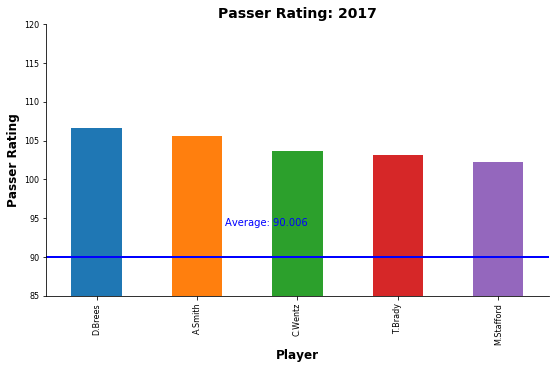

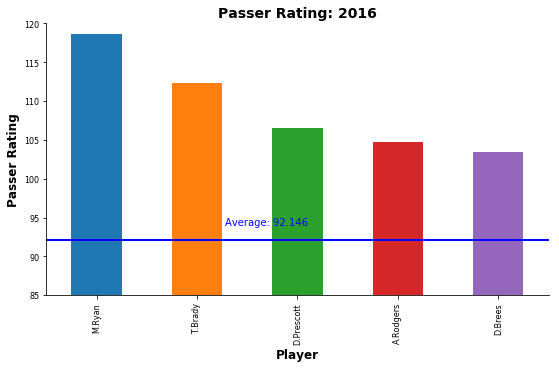

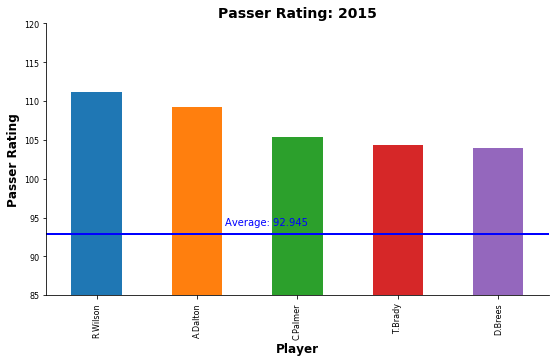

In [9]:
#Here we look to see who the top 5 passers have been over the last 3 years
PasserRatingGraph(NFL_2017_PR)
print("\n")
PasserRatingGraph(NFL_2016_PR)
print("\n")
PasserRatingGraph(NFL_2015_PR)
print("\n")


**This graph above shows the overall play of a the top 5 quarterbacks each year. Every single year, Tom Brady was listed as a top quarterback based on passer rating. To most followers of the NFL, the top 5 players each year according to this metric should not seem surprising. There is also evidently seasonal variation in quarterback play. While Matt Ryan was statistically the best in 2016, he did not crack the top 5 in 2017. Andy Dalton was considered the second best quarteback in 2015, but in 2016 and 2017 he did not make the list. **

## Part 2: Who is the most "clutch"?

In part two, we delve into the main part of our project, which is determining who the most clutch quarterbacks have been since 2009.

While the term "clutch" can be very subjective, we have defined a clutch moment primarily as the following:
* A player's team is losing by 10 points or less 
* It is the fourth and final quarter of a game
* There are less than 4 minutes to go in the game


## TAYP
To determine an objective measure of how "clutch" a quarterback is, we will be using a formula known as Total Adjusted Yards Per Play **(Will be referred to as TAYP for the entire project)**. Essentially, this formula rewards a quarterback for "good" plays such as yards gained or interceptions, and penalizes a quarterback for bad plays such as fumbles or interceptions. The beauty of this data set is the fact that it includes play by play data. Because it includes data on literally every single football play since 2009, we were able to narrow down the data into our desired situational context for clutch moments. The formula can be defined as the following:

***TAYP =  (TD x 20  + YD - INT x 45 - FB x 25) / PassATT***

TD = Touchdowns

Int = Interceptions

PassATT = Pass Attempts

FB = Fumbles

YD = Passing Yards

Hence, to be explicit, we are looking for players who have high TAYP in the fourth quarter when their teams are down by 10 points or less with 4 minutes to go. Without such a detailed and rich data set, this part of the analysis would have been impossible.

## 3rd and 4th Down Percentage


The second part of our clutch analysis deals with how well a quarterback performs under pressure over the entire game.
We determined that throughout an entire game, a "clutch" quarterback is one who allows a team to retain possession of the football. To retain possession, a quarterback must be able to convert 3rd and 4th downs to allow the team to continue to have the ball. Throughout an entire game this is an important ability and in theory, the most clutch quarterbacks should have a higher percentage in this category. For the remainder of the project, this will be either refered to as the variable FirstDown or as 3rd and 4th Down Percentage. This metric can be defined as the following.

**3rd and 4th Down Percentage (FirstDown)  = Total Number of First Downs / Pass Attempts on 3rd or 4th Down**


In [10]:
columns=  ["Season","qtr" ,"TimeSecs","down", "FirstDown",  "ScoreDiff", "HomeTeam","AwayTeam","PosTeamScore","PlayType", "Fumble" ,"ydstogo", "yrdln", "yrdline100","PassLocation", "Yards.Gained", "Touchdown", "Passer", "PassAttempt", "PassOutcome", "PassLength", "AirYards", "InterceptionThrown", "Fumble", "Win_Prob", "Sack"]

In [11]:
#We loaded the play by play data into 8 different data frames
NFL_2009 = pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2009.csv", usecols = columns)

In [12]:
NFL_2010 = pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2010.csv", usecols = columns)

In [13]:
NFL_2011 = pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2011.csv", usecols = columns)

In [14]:
NFL_2012 = pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2012.csv", usecols = columns)

In [15]:
NFL_2013 = pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2013.csv", usecols = columns)

In [16]:
NFL_2014 = pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2014.csv", usecols = columns)

In [17]:
NFL_2015 = pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2015.csv", usecols = columns)

In [18]:
NFL_2016 = pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2016.csv", usecols = columns)

In [19]:
NFL_2017 = pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2017.csv", usecols = columns)

In [20]:
Years = [NFL_2017, NFL_2016, NFL_2015, NFL_2014, NFL_2013, NFL_2012, NFL_2011, NFL_2010, NFL_2009]

**Measuring how clutch a quarterback is**

In [21]:
#This function calculates how clutch a quarterback is using TAYP and Passer Rating
def NFLCALC (Year):
    LIST = []
    
    Situational = Year[(Year["qtr"]==4) & ( Year["TimeSecs"] <240) &  (Year ["ScoreDiff"] < 0 ) & (Year ["ScoreDiff"] > -11 ) *(Year["PassAttempt"] == 1) ]
    #Narrows down our data into situations in the 4th quarter, 4 minutes to go, Qb's Team down by 10 or less

    for P in list(Year["Passer"].unique()):

        TD =Situational[Situational["Passer"] == P]["Touchdown"].sum()
        #calculates number of touchdowns in situational context
        Yards = Situational[Situational["Passer"] == P]["Yards.Gained"].sum()
         #calculates number of yards in situational context
        INT = Situational[Situational["Passer"] == P]["InterceptionThrown"].sum()
         #calculates number of interceptions in situational context
        FB = Situational[Situational["Passer"] == P]["Fumble"].sum()
         #calculates number of fumbles in situational context
        PassATT = Situational[Situational["Passer"] == P]["PassAttempt"].sum()
         #calculates number of pass attempts in situational context
        
        #calcualting First down percentage
        ThirdDownATT = Year[(Year["Passer"] == P) & (Year["down"] > 2)]["PassAttempt"].sum()
        FIRSTDOWN =  Year[(Year["Passer"] == P) & (Year["down"] > 2) & (Year["FirstDown"] == True) & (Year["PassAttempt"] == 1)]["FirstDown"].sum()
        FDP = (FIRSTDOWN / ThirdDownATT)
        
        if PassATT > 15:
        #If the quarterback had more than 10 pass attempts in this given situation, we performed the calculation of
        #Total adjusted Yards Per Play (TAYP) as defined above
            
            TAYP =  ( ((TD*20)  + Yards - (INT*45) - (FB *25)) / PassATT )     
            YR = int(Year["Season"].mean())
            LIST.append((P, TAYP, FDP, YR))
            #Appended a tuple of player and TAYP to the list that we created
    return LIST
        #returned the list
    
    
    

In [22]:
def ToDf2(Year):
    return pd.DataFrame((NFLCALC(Year)), columns=(('Player', 'TAYP', "FirstDown", "YR")))
#converts list to dataframe

In [23]:
NFL_2017_Clutch_DF = ToDf2 (NFL_2017)
NFL_2016_Clutch_DF = ToDf2 (NFL_2016)
NFL_2015_Clutch_DF = ToDf2 (NFL_2015)
NFL_2014_Clutch_DF = ToDf2 (NFL_2014)
NFL_2013_Clutch_DF = ToDf2 (NFL_2013)
NFL_2012_Clutch_DF = ToDf2 (NFL_2012)
NFL_2011_Clutch_DF = ToDf2 (NFL_2011)
NFL_2010_Clutch_DF = ToDf2 (NFL_2010)
NFL_2009_Clutch_DF = ToDf2 (NFL_2009)

All_Clutch = [NFL_2017_Clutch_DF, NFL_2016_Clutch_DF, NFL_2015_Clutch_DF, NFL_2014_Clutch_DF, NFL_2013_Clutch_DF, NFL_2012_Clutch_DF, NFL_2011_Clutch_DF, NFL_2010_Clutch_DF, NFL_2009_Clutch_DF]

#This converted all of the yearly data into multiple dataframes

/Users/Michael/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [24]:
#created graph to plot TAYP in individual years
def TAYPGraph(Year):
    Year.sort_values("TAYP",ascending = False, inplace = True)
    Y = int(Year["YR"].mean())
    T = ("TAYP " + str(Y))
    fig, ax = plt.subplots()
    Year.head(5).plot(y = "TAYP", x = "Player", ax = ax, kind='bar', figsize=(9, 5), legend=False, fontsize=8)
    ax.set_xlabel("Player", fontsize = 12, weight = "bold")
    ax.set_ylabel(("TAYP"), fontsize=12, weight = "bold")
    ax.set_ylim(0,15)
    ax.set_title(T, weight = "bold", fontsize = 14)
    avg = Year["TAYP"].mean()
    fig.text(.40, .32, ("Average: " + str(round(avg,3))) ,  fontsize=10, color="blue")
    ax.axhline(avg, color='blue', linewidth=2)    
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    plt.show()

### Top Quarterbacks by TAYP

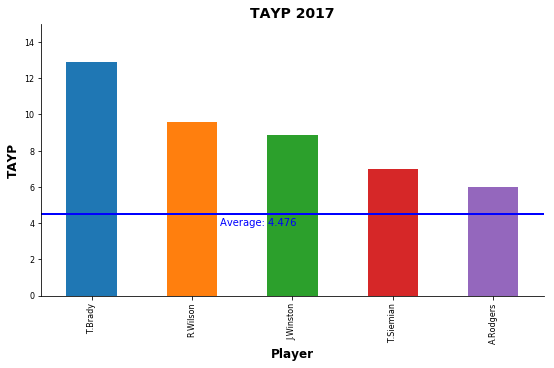

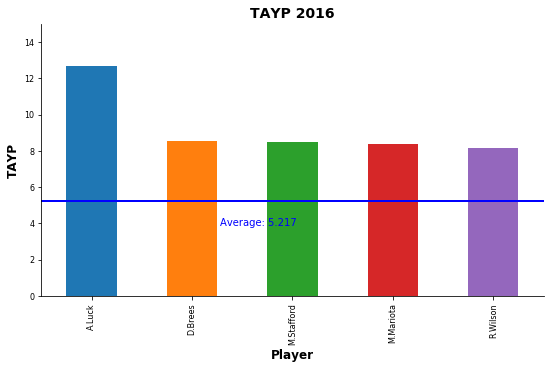

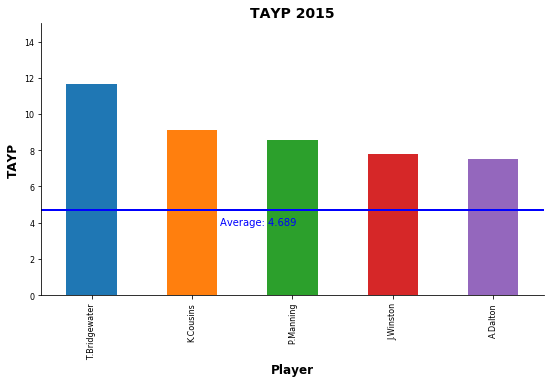

In [25]:
TAYPGraph(NFL_2017_Clutch_DF)
TAYPGraph(NFL_2016_Clutch_DF)
TAYPGraph(NFL_2015_Clutch_DF)

**Interestingly, over the last 3 years, 3 different quarterbacks have had the highest TAYP in this situational context. Russell Wilson and Jameis Winston were the only two quarterbacks to appear on in the top 5 for TAYP over the last 3 years. As a football fan, the inclusion of Trevor Simeian as one of the most clutch quarterbacks in 2017 is rather shocking. He lost his job as starting quarterback of the Denver Broncos despite having strong numbers in clutch situations.**

In [26]:
NFL_2017_Combo = pd.merge(NFL_2017_Clutch_DF.drop(columns = "YR"), NFL_2017_PR, on = "Player")
NFL_2016_Combo = pd.merge(NFL_2016_Clutch_DF.drop(columns = "YR"), NFL_2016_PR, on = "Player")
NFL_2015_Combo = pd.merge(NFL_2015_Clutch_DF.drop(columns = "YR"), NFL_2015_PR, on = "Player")
NFL_2014_Combo = pd.merge(NFL_2014_Clutch_DF.drop(columns = "YR"), NFL_2014_PR, on = "Player")
NFL_2013_Combo = pd.merge(NFL_2013_Clutch_DF.drop(columns = "YR"), NFL_2013_PR, on = "Player")
NFL_2012_Combo = pd.merge(NFL_2012_Clutch_DF.drop(columns = "YR"), NFL_2012_PR, on = "Player")
NFL_2011_Combo = pd.merge(NFL_2011_Clutch_DF.drop(columns = "YR"), NFL_2011_PR, on = "Player")
NFL_2010_Combo = pd.merge(NFL_2010_Clutch_DF.drop(columns = "YR"), NFL_2010_PR, on = "Player")
NFL_2009_Combo = pd.merge(NFL_2009_Clutch_DF.drop(columns = "YR"), NFL_2009_PR, on = "Player")
#Here we merged our datasets together for clutch performance and overall performance

In [27]:
ALLDATA = [NFL_2016_Combo,NFL_2015_Combo, NFL_2014_Combo, NFL_2013_Combo, NFL_2012_Combo,NFL_2011_Combo,NFL_2010_Combo, NFL_2009_Combo]

In [28]:
Master = pd.concat([NFL_2017_Combo, NFL_2016_Combo,NFL_2015_Combo, NFL_2014_Combo, NFL_2013_Combo, NFL_2012_Combo,NFL_2011_Combo,NFL_2010_Combo, NFL_2009_Combo])
#This is a master data frame consisting of a combination of every single years data

### Year over year analysis for select Quarterbacks

In [29]:
players = list(Master["Player"].unique())
#created a list of every single quarterback 

In [30]:
#Created a list consisting of the player and his mean TAYP over the last 8 years

MeanTAYP_List = []
for x in players:
    avg = Master[Master["Player"] == x]["TAYP"].mean()
    if len(Master[Master["Player"] == x]) > 3:
        MeanTAYP_List.append( (x, avg ))
    
    

In [31]:
MeanTAYP = pd.DataFrame( MeanTAYP_List, columns =  ("Player", "TAYP"))
#converted to dataframe

In [32]:
top5_TAYP = MeanTAYP.sort_values("TAYP", ascending = False).head(5)
#Determined who the top 5 players according to TAYP

Text(0.4,0.5,'Average: 5.09')

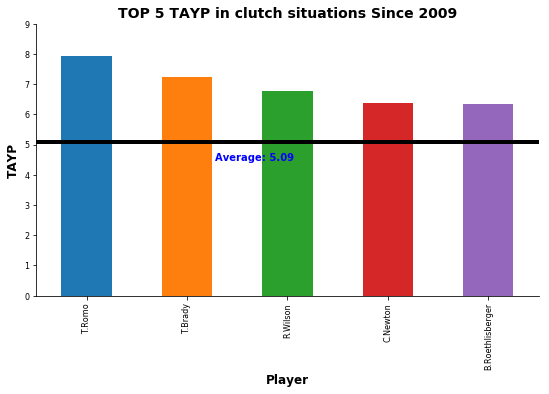

In [33]:
#created a plot for TAYP
fig,ax = plt.subplots()
top5_TAYP.plot(y = "TAYP", x = "Player", ax = ax, kind='bar', figsize=(9, 5), legend=False, fontsize=8)
ax.set_xlabel("Player", fontsize = 12, weight = "bold")
ax.set_ylabel(("TAYP"), fontsize=12, weight = "bold")
ax.set_ylim(0,9)
ax.set_title("TOP 5 TAYP in clutch situations Since 2009", weight = "bold", fontsize = 14)
avg = MeanTAYP["TAYP"].mean()   
ax.axhline(avg, color='black', linewidth=4)    
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
fig.text(.40, .5, ("Average: " + str(round(avg,2))) ,  fontsize=10, color="blue", weight = "bold")

**This figure shows who the top 5 most clutch quarterbacks have been since 2009 according to TAYP. Tony Romo, Tom Brady, and Russell Wilson are considered the top 3 most clutch quarterbacks by this metric. To most football fans this will come as no surprise. Cam Newton and Ben Roethlisberger are also very accomplished NFL Quarterbacks. Between these top players there is a combined 8 SuperBowl victories since 2000. 8 out of the last 10 superbowls have included at least one of these Quarterbacks in this graph.**

**Based on this historical knowledge, we are very confident that our measure of clutch is both accurate and interesting. If our results had contained quarterbacks who are thought to be bad under pressure, we would not trust our analysis. We are thus excited by the results that we have obtained. ** 

In [34]:
#Defined a graph to plot a players TAYP over seasons
def TAYP_Over_Time(Name):
      PlayerDF =  Master[Master["Player"] == Name]
      fig2,ax2 = plt.subplots()
      PlayerDF.plot.scatter(x = "YR", y = "TAYP", ax = ax2, figsize = (10,6) , s = 100, marker ="D" )
      TAYP_AVG = Master["TAYP"].mean()
      ax2.set_xlabel("Year", fontsize = 12, weight = "bold")
      ax2.tick_params(width = 2)
      ax2.set_ylabel("TAYP", fontsize = 12, weight = "bold")
      ax2.set_title( (Name + " Yearly TAYP vs. League Average"), fontsize = 12,weight = "bold" )
      ax2.axhline(TAYP_AVG, color='black', linewidth=2) 
      fig2.text(.5, .4, ("League Average: " + str(round(TAYP_AVG,2))) ,  fontsize=10, color="blue")
      ax2.spines['right'].set_color('none')
      ax2.spines['top'].set_color('none')
#Created our graph to plot a players TAYP vs time.

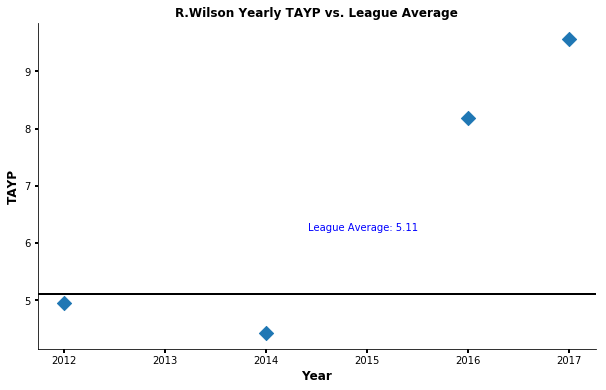

In [35]:
TAYP_Over_Time("R.Wilson")

**Interestingly, Russell Wilson started his career less "clutch" than he has been in the last few years. This indicates that he has improved throughout his career**


*Note, in some years TAYP was not recorded due to a lack of amount of plays in "clutch" moments*

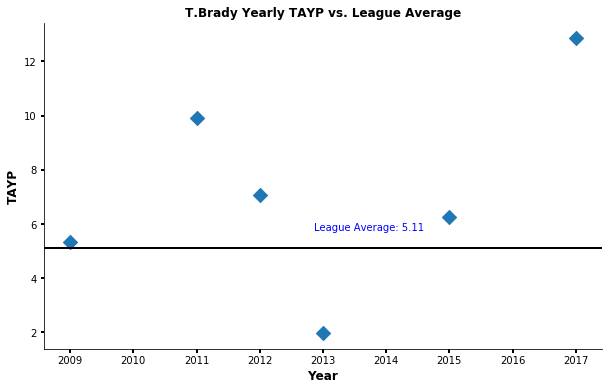

In [36]:
TAYP_Over_Time("T.Brady")

**In 2017, Tom Brady was rated the most clutch quarterback by this metric. Many believe that he is the greatest quarterback of all time. However, in some years he was evidently either league average or below average according to TAYP. However, most years he is an above average clutch quarterback. **

*Note, in some years TAYP was not recorded due to a lack of amount of plays in "clutch" moments*

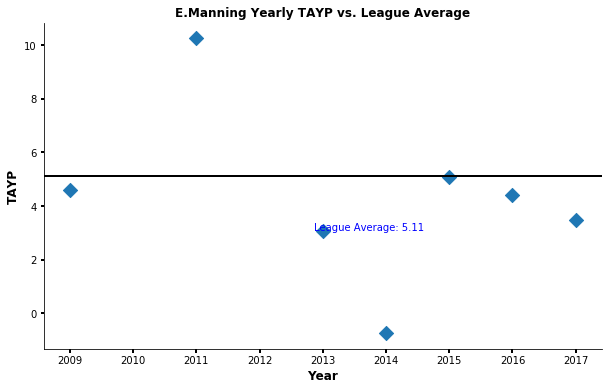

In [37]:
TAYP_Over_Time("E.Manning")

**Eli Manning is a notorious NY sports star. We included this tangent to demonstrate that players clutch levels can deteriorate over time. Eli Manning is known for his superbowl championships in which he came back from behind to win twice. While these comebacks have given him the label of "clutch" he is clearly not a clutch quarterback over the last 5 years. In 2011, however, the year he and the Giants won the superbowl, he was the most clutch quarterback. Unlike Russell Wilson, Eli Manning has actually gotten worse as he has gotten older.**

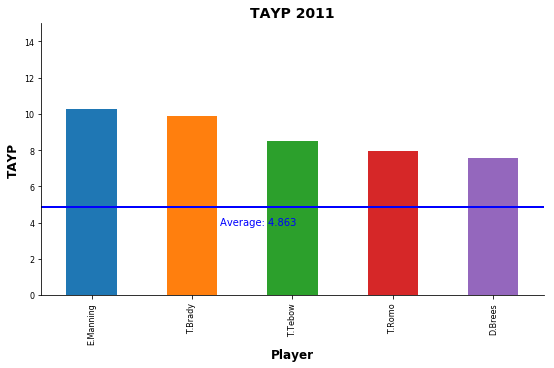

In [38]:
TAYPGraph(NFL_2011_Clutch_DF)

**Although he has been less clutch than Tom Brady throughout his entire career, Eli Manning was considered more clutch than him in 2011. Ironically, Eli Manning's Giants beat Tom Brady's Patriots in the superbowl that year with a clutch comeback. Despite this, Tom Brady has remained consistently more clutch throughout his entire career.**

### Exploring 3rd and 4th Down Percentage

Next, we looked into our metric known as 3rd and 4th Down percentage. This measures how often a quarterback gets a first down when his team is on 3rd or 4th down. In our dataset it is labeled as "FirstDown"

In [39]:
#Created a graph to plot a players 3rd and 4th down percentage vs TAYP
def FirstDownGraph(Year):
    Year.sort_values("FirstDown",ascending = False, inplace = True)
    Y = int(Year["YR"].mean())
    T = ("3rd and 4th Down Percentage vs TAYP " + str(Y))
    fig, ax = plt.subplots()
    
    Year.head(5).plot(y = "FirstDown", x = "Player", ax = ax, kind='bar', figsize=(10, 6), legend=False, fontsize=8)
    ax.set_xlabel("Player", fontsize = 12, weight = "bold")
    ax.set_ylabel(("3 & 4th Down Percentage"), fontsize=12, weight = "bold")
    ax.set_ylim(.2,.6)
    ax.set_title(T, weight = "bold", fontsize = 14)
    avg = Year["FirstDown"].mean() 
    ax.spines['top'].set_color('none')
    
    ax2 = ax.twinx()
    Year.head(5).plot(y = "TAYP", x = "Player", ax = ax2, figsize=(9, 5), legend=False, fontsize=8, color = "black")
    ax2.set_ylabel("TAYP", weight = "bold")
    ax2.spines['top'].set_color('none')
    plt.show()
#This function creates our graph that plots a players 3rd and 4th down conversion percentage vs TAYP

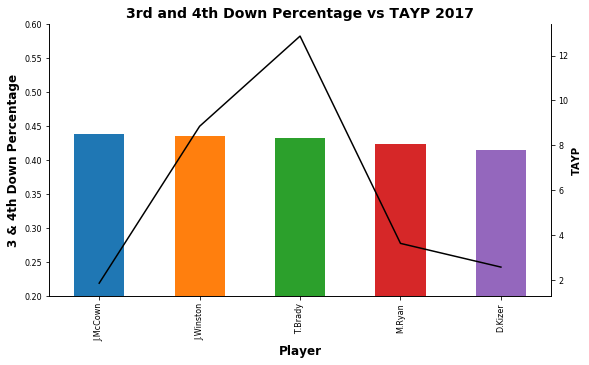

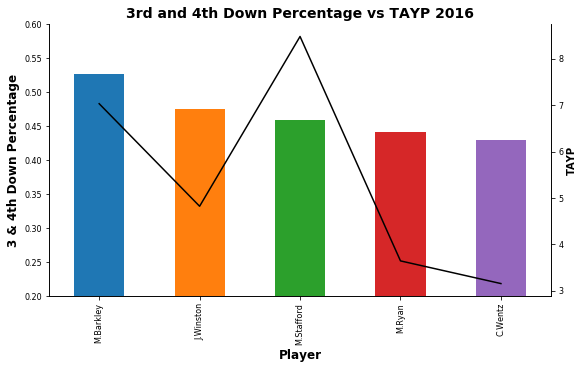

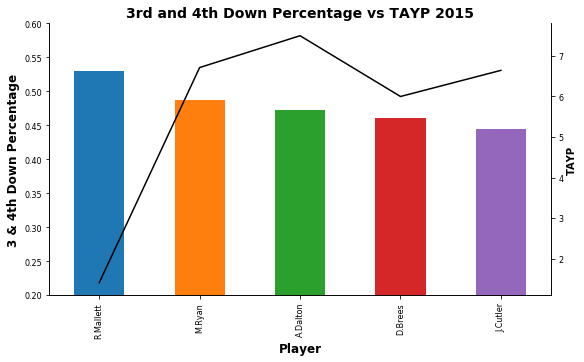

In [40]:
FirstDownGraph(NFL_2017_Clutch_DF)
FirstDownGraph(NFL_2016_Clutch_DF)
FirstDownGraph(NFL_2015_Clutch_DF)

**Interestingly, there seems to be a weak relationship beteen TAYP and 3rd & 4th down percentage. We hypothesized that these two measures of how clutch a quarterback are would be somewhat related. However, in 2 of the last 3 years, the quarterback with the highest 3 & 4th down percentage had a below average TAYP. These metrics thus independently show factors that a team would want in a quarterback. However, they are not closely correlated. A player who has a high 3rd and 4th down percentage, like Ryan Mallett in 2015, can be below league average in clutch moments. Moreover, Matt Barkley and Josh McCown were the top quarterbacks for 3rd & 4th down percentage in 2016 and 2017 respectively. These players have historically not been known to be great quarterbacks. Based on their inclusion in the top 5 for this metric, we are slightly less confident in this metric in determining how clutch a quarterback is. TAYP evidently appears to be a more reliable metric. **

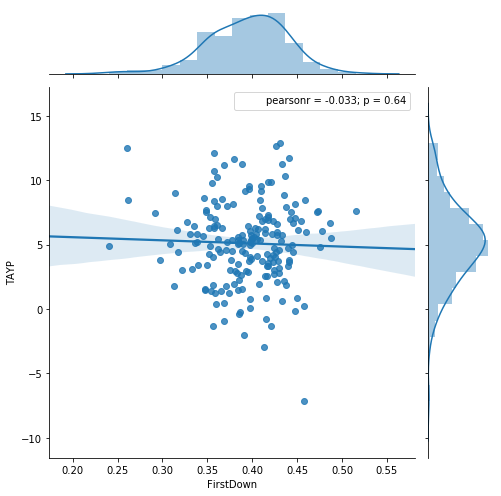

In [41]:
sns.jointplot(x= "FirstDown", y = "TAYP", data = Master ,kind = "reg", size = 7)

**We were curious, so we used seaborn to examine the relationship between "FirstDown" (A quarterback's 3rd and 4th down percentage) and TAYP. We found that there is actually no relationship between these two measures, a surprising finding. If 3rd and 4th down completions (FirstDown) was a reliable metric, it would be correlated with TAYP, which we have already established as a very strong determinant of how clutch a quarterback is.**

In [42]:
MeanFD_List = []
#created a list of players and their average third and fourth down percentage
for x in players:
    avg = Master[Master["Player"] == x]["FirstDown"].mean()
    if len(Master[Master["Player"] == x]) > 3:
        MeanFD_List.append( (x, avg ))
    
    

In [43]:
MeanFD = pd.DataFrame( MeanFD_List, columns =  ("Player", "FirstDown"))

In [44]:
top5_FD =  MeanFD.sort_values("FirstDown", ascending = False ).head(5)

Text(0.4,0.5,'Average: 0.398')

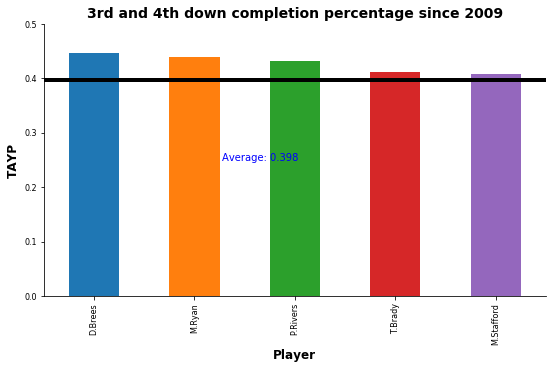

In [45]:
#Created a plot to plot the top players in third and fourth down percentage
fig,ax = plt.subplots()
top5_FD.plot(y = "FirstDown", x = "Player", ax = ax, kind='bar', figsize=(9, 5), legend=False, fontsize=8)
ax.set_xlabel("Player", fontsize = 12, weight = "bold")
ax.set_ylabel(("TAYP"), fontsize=12, weight = "bold")
ax.set_ylim(0,.5)
ax.set_title("3rd and 4th down completion percentage since 2009", weight = "bold", fontsize = 14)
avg = MeanFD["FirstDown"].mean()   
ax.axhline(avg, color='black', linewidth=4)    
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
fig.text(.40, .5, ("Average: " + str(round(avg,3))) ,  fontsize=10, color="blue")

** In terms of 3rd and 4th down completion percentage Drew Brees, Matt Ryan, Philip RIvers and Tom Brady are considered the most clutch quarterbacks. While there was variation across different seasons, this top 5 list which averages the 3rd and 4th down completion percentages over the seasons seems relatively reliable. This list contains quarterbacks which are known to be very strong franchise quarterbacks. Yet again, we see Tom Brady considered as a top quarterback by another metric. Because he was in the top 5 for both TAYP and 3rd and 4th down completion percentage, and knowing his history, we believe he should be considered the most clutch quarterback since 2009. **

## Part 3

In Part 3, we explore the relationship between a quarterbacks overall play and their "clutch" ability. We want to see if there is a relationship between overall quarterback play and play in "crunch time." Are the best quartebacks according to passer rating better in pressure situations? We hypothesized that the top players based on overall play would likely be more clutch than the less players who are worse overall. For example, Tom Brady has had a strong passer rating since 2009 and has also had the second highest TAYP in that period. We used data visualization and a regression in order to determine our answer. In this section we took advantage of Seaborn and Statsmodels, two packages that we learned outside of class.

First, we wanted to get a better understanding of our data.

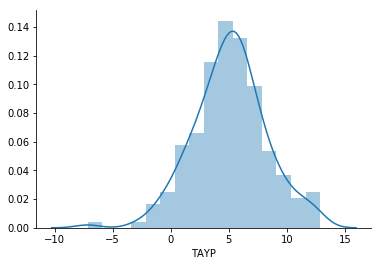

In [46]:
sns.distplot(Master["TAYP"])
sns.despine()

**Since 2009 the mean TAYP for every quarterback in clutch moments has been roughly 5** 

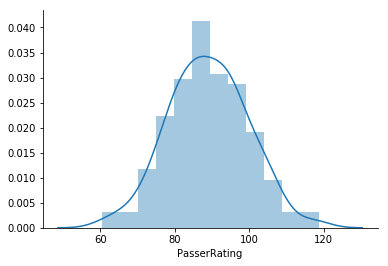

In [47]:
sns.distplot(Master["PasserRating"])
sns.despine()

**Over the last 7 years, the mean PasserRating for these quarterbacks has been roughly 85**

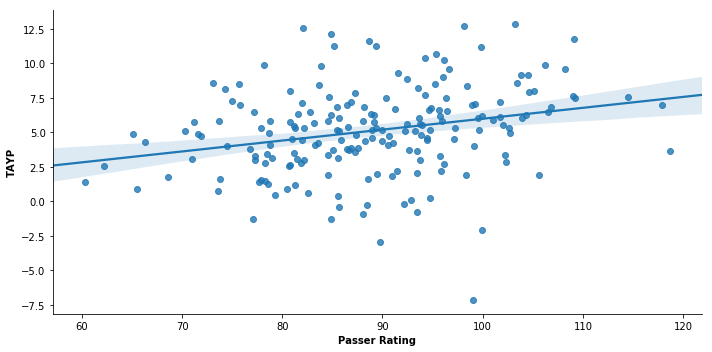

In [48]:
reg  = sns.lmplot( x = "PasserRating", y = "TAYP" ,data = Master, palette='coolwarm', aspect =2 )
reg.set_xlabels("Passer Rating", weight = "bold")
reg.set_ylabels("TAYP", weight = "bold")

**There appears to be a weak linear relationship between Passer Rating and TAYP**

**As we can see here again , there is a weak linear relationship between a quarterbacks passer rating and his clutch rating.**

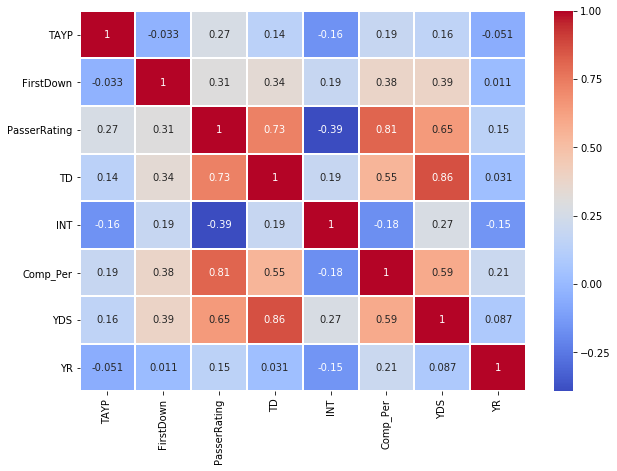

In [49]:
plt.figure(figsize=(10, 7))
sns.heatmap(Master.corr(), annot = True, cmap = "coolwarm" , linecolor = "white", linewidths = 1)

**We created a matrix of our data set in order to disaggregate the data. From this, we determined that the best predictor of TAYP in clutch sitautions is passer rating. Thus, we decided to run a regression on it below to see how well one can predict a quarterbacks clutch performance from their overall performance. Another important finding from this correlation matrix is the lack of a relationship between our variable FirstDown and TAYP, a finding that we saw in a jointplot above.**

## Linear Regression

**Using statsmodels.api, we wanted to see if we could create a model that predicted the ability of a quarterback to perform in the clutch based on his overall play (Passer Rating). **

In [50]:
import statsmodels.api as sm
y = Master["TAYP"]
X = Master[[ "PasserRating"]]
X = sm.add_constant(X)



/Users/Michael/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [51]:
model = sm.OLS(y, X)
results = model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   TAYP   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     14.59
Date:                Wed, 09 May 2018   Prob (F-statistic):           0.000180
Time:                        16:03:34   Log-Likelihood:                -490.83
No. Observations:                 194   AIC:                             985.7
Df Residuals:                     192   BIC:                             992.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.9216      1.853     -1.037   

Our X variable is passer rating, while our y variable is TAYP

Our model's β<sub>1</sub> is 0.079, which we can interpret as follows: for every 1 point increase in passer rating, the model predicts a .079 unit increase in TAYP. This coefficient is highly statistically significant, which we can see from the fact that the P>|t| output is below the 0.05 level. 

Our model's β<sub>0</sub> is -1.97. However, the P>|t| output shows that it is not statistically significant. This metric is thus not meaningful in this analysis.

The model has an R<sup>2</sup> of 7%, which indicates a very weak 'goodness of fit.' However, the Prob(F-statistic) value of 0.00018 shows that the overall regression is highly statistically significant (the value indicates that there is a 1.8 in 10,000 chance that all of the regression parameters are actually zero. This low value implies that at least some of our parameters are nonzero).

**While this is an interesting finding, we needed to determine how well our model actually goes about predicting TAYP**

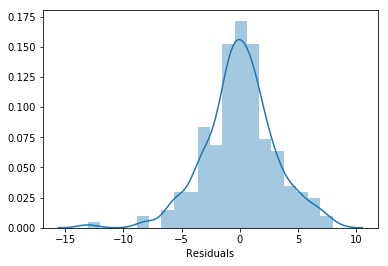

In [52]:
sns.distplot(results.resid,axlabel = "Residuals")

The residuals appear to be normally disributed, so we can conclude that there are no violations to our model's assumptions.

# CITATIONS

Data: https://github.com/maksimhorowitz/nflscrapR 

 Seaborn knowledge: https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/overview

TAYP formula: http://www.thegridfe.com/2016/03/31/new-total-adjusted-yards-per-play-since-1992/

Inspiration for project http://thelab.bleacherreport.com/best-quarterbacks-nfl-2016-formula/